In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

data = pd.read_csv("danoDatabase/danoClearData.csv", delimiter=',')

In [11]:
id_ageloh = data[['athlete_id', 'num_locations', 'times', 'median_time']]
id_ageloh = id_ageloh.sort_values(by=['times'], kind='quicksor', ascending=False)
id_ageloh = id_ageloh[~data.athlete_id.duplicated(keep='last')]
id_ageloh = id_ageloh.sort_values(by=['median_time'], kind='quicksort', ascending=True)
print(id_ageloh['median_time'])

1701       1005
58508      1014
68442      1015
238        1015
31296    1016,5
          ...  
1105        989
21569       990
7429        991
30545       992
55664       995
Name: median_time, Length: 20387, dtype: object


C:\Users\mazh0\AppData\Local\Temp\ipykernel_15892\616597882.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  id_ageloh = id_ageloh[~data.athlete_id.duplicated(keep='last')]


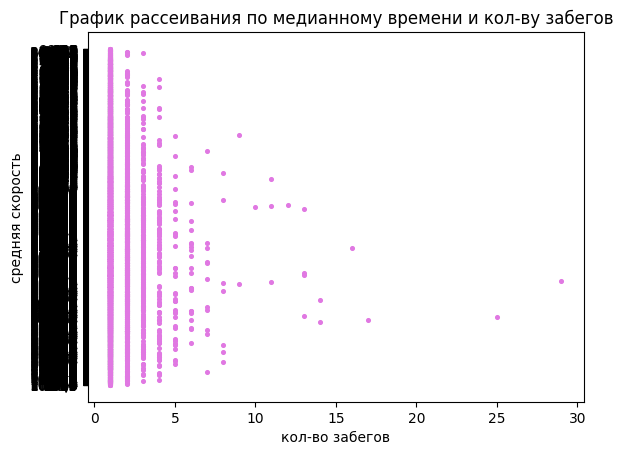

In [9]:
X1 = []
Y1 = []
list_mtime = list(id_ageloh['median_time'])
list_num = list(id_ageloh['num_locations'])
list_times = list(id_ageloh['times'])
ez_cheat = list(id_ageloh['athlete_id'])

'''for el in list_mtime:
    Y1.append(el)
for elem in list_num:
    X1.append(elem)'''


plt.scatter(list_num, list_mtime, color='#E078E2', s = 7)
plt.title('График рассеивания по медианному времени и кол-ву забегов')
plt.xlabel('кол-во забегов')
plt.ylabel('средняя скорость')
plt.show()

In [6]:
X = list_num
Y = list_mtime
X = [X[i:i + 1] for i in range(0, len(X))]
X = np.array(X)
y = np.array(Y)

model = LinearRegression()
model.fit(X, Y)

# Получаем коэффициенты
coeff = model.coef_[0]
intercept = model.intercept_

# Предсказания и остатки
predictions = model.predict(X)
residuals = Y - predictions

# Стандартная ошибка
n = len(Y)
std_err = np.sqrt(np.sum(residuals**2) / (n - 2))

# Стандартная ошибка для коэффициента
X_mean = np.mean(X)
std_err_coeff = std_err / np.sqrt(np.sum((X - X_mean)**2))

# t-статистика
t_stat = coeff / std_err_coeff

# p-value
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

print(f'Коэффициент: {coeff}, t-статистика: {t_stat}, p-value: {p_value}')

Коэффициент: -5.188008948261529, t-статистика: -8.06438645615986, p-value: 8.881784197001252e-16


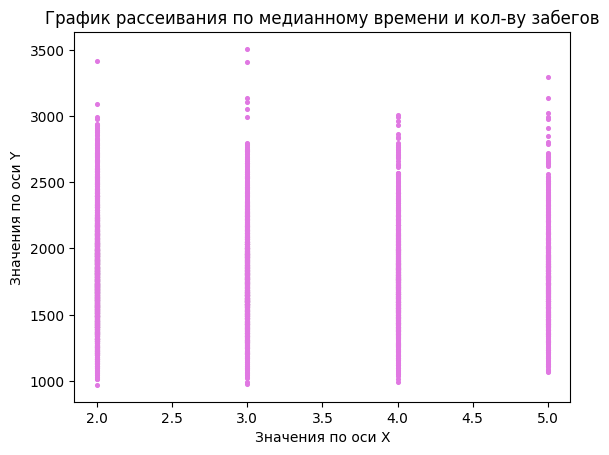

[1,
 1,
 4,
 2,
 2,
 1,
 2,
 1,
 3,
 3,
 2,
 2,
 1,
 1,
 4,
 1,
 1,
 2,
 1,
 1,
 7,
 6,
 2,
 3,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 4,
 12,
 12,
 10,
 3,
 1,
 1,
 1,
 2,
 4,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 2,
 4,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 4,
 2,
 2,
 3,
 1,
 1,
 3,
 1,
 5,
 1,
 1,
 1,
 1,
 4,
 9,
 1,
 1,
 1,
 5,
 1,
 2,
 1,
 1,
 5,
 2,
 1,
 1,
 2,
 1,
 1,
 8,
 2,
 5,
 2,
 1,
 4,
 1,
 14,
 3,
 2,
 5,
 1,
 3,
 1,
 6,
 4,
 6,
 13,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 2,
 4,
 1,
 7,
 2,
 1,
 1,
 1,
 7,
 2,
 3,
 1,
 4,
 3,
 1,
 2,
 1,
 1,
 1,
 3,
 4,
 2,
 2,
 3,
 1,
 1,
 9,
 1,
 2,
 2,
 1,
 2,
 3,
 5,
 1,
 1,
 5,
 5,
 8,
 1,
 2,
 14,
 5,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 9,
 1,
 1,
 2,
 6,
 1,
 3,
 2,
 2,
 3,
 1,
 2,
 3,
 4,
 1,
 7,
 1,
 1,
 1,
 4,
 1,
 1,
 4,
 1,
 1,
 1,
 2,
 10,
 1,
 12,
 3,
 6,
 1,
 5,
 21,
 1,
 1,
 4,
 5,
 3,
 2,
 18,
 1,
 1,
 2,
 1,
 3,
 42,
 2,
 5,
 1,
 1,
 1,
 1,
 13,
 2,
 6,
 1,
 1,
 14,
 1,
 2,
 3,
 1,
 2,
 4,
 1,

In [13]:
X2 = []
Y2 = []
list_mtime = list(id_ageloh['median_time'])
list_num = list(id_ageloh['num_locations'])
list_times = list(id_ageloh['times'])
for i in range(len(list_times)):
    if list_times[i] > 1 and list_times[i] < 6:
        X2.append(list_times[i])
        Y2.append(float(str(list_mtime[i]).replace(',', '.')))


'''print(max(Y1))
index = Y1.index(max(Y1))
print(list_mtime[index])'''

'''del Y1[index]
del X1[index]'''
'''
f = open("check.txt", "w")
print(Y1, X1, list_mtime, sep='\n', file=f)
f.close()'''

plt.scatter(X2, Y2, color='#E078E2', s = 7)
plt.title('График рассеивания по медианному времени и кол-ву забегов')
plt.xlabel('Значения по оси X')
plt.ylabel('Значения по оси Y')
plt.show()

list_times

In [413]:
X = X2
Y = Y2
X = [X[i:i + 1] for i in range(0, len(X))]
X = np.array(X)
y = np.array(Y)

model = LinearRegression()
model.fit(X, Y)

# Получаем коэффициенты
coeff = model.coef_[0]
intercept = model.intercept_

# Предсказания и остатки
predictions = model.predict(X)
residuals = Y - predictions

# Стандартная ошибка
n = len(Y)
std_err = np.sqrt(np.sum(residuals**2) / (n - 2))

# Стандартная ошибка для коэффициента
X_mean = np.mean(X)
std_err_coeff = std_err / np.sqrt(np.sum((X - X_mean)**2))

# t-статистика
t_stat = coeff / std_err_coeff

# p-value
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

print(f'Коэффициент: {coeff}, t-статистика: {t_stat}, p-value: {p_value}')

Коэффициент: -0.8894345216783075, t-статистика: -0.22112203774813072, p-value: 0.8250037725709098


In [414]:
id_ageloh = data[['athlete_id', 'num_locations', 'times', 'mean_time']]
id_ageloh = id_ageloh.sort_values(by=['times'], kind='quicksor', ascending=False)
id_ageloh = id_ageloh[~data.athlete_id.duplicated(keep='last')]


C:\Users\mazh0\AppData\Local\Temp\ipykernel_4236\1425590631.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  id_ageloh = id_ageloh[~data.athlete_id.duplicated(keep='last')]


In [415]:

list_num = list(id_ageloh['num_locations'])
list_mean = list(id_ageloh['mean_time'])
for i in range(len(list_mean)):
    list_mean[i] = list_mean[i]
list_times = list(id_ageloh['times'])
k = 9
n = []
for i in range(k):
    n.append([])
for i in range(len(list_num)):
    if list_times[i] == k:
        for j in range(1, k + 1):
            if list_num[i] == j:
                n[j - 1].append(float(list_mean[i]))

repeats = []
for i in range(1, len(n)):
    repeats.append(len(n[i]))
result_list = []
for i in range(1, len(n)):
    result_list += n[i]
labels_list = []
for i in range(2, len(n) + 1):
    labels_list.append(f'{i} разных трасс')
len(n), len(repeats), len(labels_list)

(9, 8, 8)

In [416]:
import pingouin as pg 
import pandas as pd 
import numpy as np 

df = pd.DataFrame({'score': result_list, 
                   'group': np.repeat(labels_list, 
                                      repeats=repeats)}) 
pg.welch_anova(dv='score', between='group', data=df) 

,Source,ddof1,ddof2,F,p-unc,np2
0,group,4,6.716998,3.186036,0.089837,0.021951


In [417]:
data_t = data.copy()
data_t = data_t[['weather.main', 'track_description_surface', 'athlete_id', 'finish_time', 'temp']] # and wind_speed > ??
data_t


,weather.main,track_description_surface,athlete_id,finish_time,temp
0,Rain,"асфальт, бетон",790055465,1260,7.90
1,Clouds,"асфальт, бетон",790055465,1098,6.81
2,Clouds,"асфальт, бетон",790055465,1138,17.61
3,Clouds,"асфальт, бетон",790055465,1420,-4.57
4,Clear,смешанное,790055533,1222,5.48
...,...,...,...,...,...
74979,Clouds,смешанное,790165194,1775,-3.05
74980,Clouds,смешанное,790165194,1726,1.44
74981,Clear,твердое,790165194,1781,5.71
74982,Mist,смешанное,790165194,1996,2.56


In [418]:
weathers = ['Rain', 'Snow', 'Clear', 'Clouds']
weather_table = dict()
for i, weather_state in enumerate(weathers):
    weather_table[weather_state] = data_t[data_t['weather.main'] == weathers[i]].copy()

weather_table


{'Rain':       weather.main track_description_surface  athlete_id  finish_time   temp
 0             Rain            асфальт, бетон   790055465         1260   7.90
 7             Rain                   твердое   790055774         1276   8.05
 17            Rain                   твердое   790055798         1445  18.67
 18            Rain                   твердое   790055798         1466  19.38
 20            Rain                   твердое   790055798         1525  14.49
 ...            ...                       ...         ...          ...    ...
 74925         Rain                   твердое   790161194         1547   2.84
 74956         Rain                   твердое   790161230         2325   2.10
 74959         Rain                   твердое   790161242         1902   3.31
 74960         Rain                   твердое   790161244         2467   3.31
 74961         Rain                   твердое   790161245         2052   3.31
 
 [6942 rows x 5 columns],
 'Snow':       weather.main 

In [419]:
t_left = 3
t_right = 25
# 0 - t < t_left
# 1 - t_left <= t < t_right
# 2 - t_right <= t

weather_table_t = dict()
for i, weather_state in enumerate(weathers):
    if weather_state not in weather_table_t:
        weather_table_t[weather_state] = dict()
    tmp = weather_table[weather_state].copy()
    # tmp['temp'] = tmp['temp'].apply(lambda s: float(s.replace(',', '.')))
    weather_table_t[weather_state][0] = tmp[tmp['temp'] < t_left]
    weather_table_t[weather_state][1] = tmp[(tmp['temp'] >= t_left) & (tmp['temp'] < t_right)]
    weather_table_t[weather_state][2] = tmp[tmp['temp'] >= t_right]
    
weathers = ['Rain', 'Snow', 'Clear', 'Clouds']
weather_table = dict()
for i, weather_state in enumerate(weathers):
    weather_table[weather_state] = data_t[data_t['weather.main'] == weathers[i]].copy()

weather_table
weather_table_t


{'Rain': {0:       weather.main track_description_surface  athlete_id  finish_time  temp
  195           Rain                     грунт   790057837         1431  1.34
  393           Rain           плитка, асфальт   790059969         1572  1.33
  396           Rain                   твердое   790059994         1299  2.79
  551           Rain                   твердое   790061802         1502  2.79
  555           Rain           асфальт, плитка   790061802         1644  1.25
  ...            ...                       ...         ...          ...   ...
  74765         Rain                   твердое   790160475         1976  2.10
  74867         Rain                   твердое   790161081         1918  2.72
  74912         Rain                   твердое   790161167         1740  2.10
  74925         Rain                   твердое   790161194         1547  2.84
  74956         Rain                   твердое   790161230         2325  2.10
  
  [578 rows x 5 columns],
  1:       weather.main 

In [420]:
result_val = dict()
surfaces = ['твердое', 'асфальт', 'грунт', 'тротуарная плитка', 'смешанное']
for surface in surfaces:
    result_val[surface] = dict()
    for i, weather_state in enumerate(weathers):
        for k_temp in [0, 1, 2]:
            tmp = weather_table_t[weather_state][k_temp].copy()
            tmp = tmp[['athlete_id', 'finish_time', 'track_description_surface']]
            print(tmp['track_description_surface'].value_counts())
            tmp = tmp[tmp['track_description_surface'] == surface]
            print(tmp)
            # print(tmp.groupby(['athlete_id'])['finish_time'].mean())
            result_val[surface][weather_state] = tmp.groupby(['athlete_id'])['finish_time'].mean().to_list() # mb just tmp

print(*result_val)
for s in result_val:
    print(s, result_val[s])


track_description_surface
твердое                                         276
асфальт                                          90
смешанное                                        74
грунт                                            35
плитка, асфальт                                  19
асфальт, грунт                                   19
разнородное - грунт, гравий, асфальт, плитка     12
беговая дорожка, тротуарная плитка               12
асфальт/твердый грунт                            11
гранитная крошка, грунт                           9
асфальт, плитка                                   8
резиновая дорожка, мраморная плитка               6
плитка, асфальт, грунт                            5
тротуарная плитка                                 2
Name: count, dtype: int64
       athlete_id  finish_time track_description_surface
396     790059994         1299                   твердое
551     790061802         1502                   твердое
718     790063106         1624                   

In [421]:
from scipy.stats import f_oneway

values_surfaces = dict()

for i, surface in enumerate(surfaces):
    anova_batch = list()
    for j, weather in enumerate(weathers):
        # print(result_val[surface])
        anova_batch.append(result_val[surface][weather])
        if len(anova_batch) > 0 and len(anova_batch[-1]) <= 10:
            anova_batch.pop()
    if len(anova_batch) <= 1:
        continue
    fvalue, pvalue = f_oneway(*anova_batch)
    values_surfaces[surface] = (fvalue, pvalue)


for surface in values_surfaces:
    print(surface, ': ', *values_surfaces[surface])


твердое :  6.0088228645250545 0.0025960005675782303
асфальт :  0.23715135428477882 0.6269174642640478
тротуарная плитка :  2.4476230664684175 0.1199932727433399
смешанное :  2.034703210739026 0.15671082101732245


C:\Users\mazh0\AppData\Local\Temp\ipykernel_4236\290440244.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  id_ageloh = id_ageloh[~data.athlete_id.duplicated(keep='last')]


[940.0, 957.0, 961.0, 979.0, 981.0, 985.0, 990.0, 992.0, 995.0, 1005.0, 1014.0, 1017.0, 1023.0, 1030.0, 1034.0, 1041.0, 1042.0, 1043.0, 1045.0, 1046.0, 1047.0, 1048.0, 1050.0, 1052.0, 1053.0, 1054.0, 1058.0, 1059.0, 1062.0, 1063.0, 1064.0, 1065.0, 1067.0, 1068.0, 1071.0, 1073.0, 1074.0, 1075.0, 1076.0, 1077.0, 1078.0, 1080.0, 1081.0, 1082.0, 1083.0, 1087.0, 1088.0, 1090.0, 1091.0, 1092.0, 1094.0, 1096.0, 1097.0, 1098.0, 1099.0, 1100.0, 1102.0, 1103.0, 1104.0, 1107.0, 1108.0, 1110.0, 1112.0, 1113.0, 1114.0, 1116.0, 1117.0, 1118.0, 1119.0, 1120.0, 1121.0, 1122.0, 1123.0, 1124.0, 1125.0, 1126.0, 1127.0, 1128.0, 1130.0, 1131.0, 1132.0, 1134.0, 1135.0, 1136.0, 1137.0, 1138.0, 1140.0, 1141.0, 1142.0, 1143.0, 1144.0, 1145.0, 1146.0, 1147.0, 1148.0, 1149.0, 1150.0, 1151.0, 1153.0, 1154.0, 1155.0, 1156.0, 1157.0, 1158.0, 1160.0, 1161.0, 1162.0, 1163.0, 1164.0, 1165.0, 1166.0, 1167.0, 1168.0, 1169.0, 1170.0, 1171.0, 1172.0, 1173.0, 1174.0, 1176.0, 1178.0, 1179.0, 1180.0, 1181.0, 1182.0, 1183.0, 

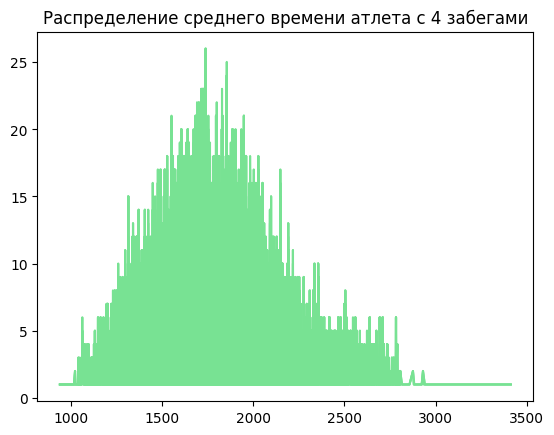

In [422]:
id_ageloh = data[['athlete_id', 'num_locations', 'times', 'mean_time']]
id_ageloh = id_ageloh.sort_values(by=['times'], kind='quicksor', ascending=False)
id_ageloh = id_ageloh[~data.athlete_id.duplicated(keep='last')]
list_mean = list(id_ageloh['mean_time'])
l = []
r = []
for i in range(1, 5):
    for p in range(len(list_mean)):
        if list_times[p] == i:
            l.append(list_mean[p])
            r.append(list_times[p])
    set_mean = list(set(l))
    set_mean.sort()
    value_list = []
    for d in range(len(set_mean)):
        value_list.append(l.count(set_mean[d]))
    print(set_mean, '\n', value_list)
    plt.plot(set_mean, value_list, color='#78E293')
    plt.title(f'Распределение среднего времени атлета с {i} забегами')
    plt.show

In [423]:

list_num = list(id_ageloh['num_locations'])
list_mean = list(id_ageloh['mean_time'])
for i in range(len(list_mean)):
    list_mean[i] = list_mean[i]
list_times = list(id_ageloh['times'])
k =9
n = []
for i in range(k):
    n.append([])
for i in range(len(list_num)):
    if list_times[i] == k:
        for j in range(1, k + 1):
            if list_num[i] == j:
                n[j - 1].append(float(list_mean[i]))

repeats = []
for i in range(len(n)):
    repeats.append(len(n[i]))
result_list = []
for i in range(len(n)):
    result_list += n[i]
labels_list = []
for i in range(1, len(n) + 1):
    labels_list.append(f'{i} разных трасс')

In [424]:
import pingouin as pg 
import pandas as pd 
import numpy as np 

df = pd.DataFrame({'score': result_list, 
                   'group': np.repeat(labels_list, 
                                      repeats=repeats)}) 
model = ols('score ~ group', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
group,3.737592e+05,5.0,0.725713,0.604589
Residual,3.131341e+07,304.0,NaN,NaN


In [425]:
from scipy.stats import shapiro

id_ageloh = data[['athlete_id', 'num_locations', 'times', 'mean_time']]
id_ageloh = id_ageloh.sort_values(by=['times'], kind='quicksor', ascending=False)
id_ageloh = id_ageloh[~data.athlete_id.duplicated(keep='last')]


result = 0
bad_result = 0
unknown = 0
for k in range(1, 10):
    list_num = list(id_ageloh['num_locations'])
    list_mean = list(id_ageloh['mean_time'])
    for i in range(len(list_mean)):
        list_mean[i] = list_mean[i]
    list_times = list(id_ageloh['times'])
    n = []
    for i in range(k):
        n.append([])
    for i in range(len(list_num)):
        if list_times[i] == k:
            for j in range(1, k + 1):
                if list_num[i] == j:
                    n[j - 1].append(float(list_mean[i]))

    for i in range(len(n)):
        try:
            #print(n[i])
            data = np.array(n[i])

            # Тест Шапиро-Уилка
            stat, p_value = shapiro(data)
            #print(f"Статистика теста: {stat}")
            #print(f"p-значение: {p_value}")

            # Интерпретация
            if p_value > 0.05:
                result += 1
                #print("Данные распределены нормально (не отклоняем нулевую гипотезу)")
            else:
                bad_result += 1
                print(p_value)

                #print("Данные не распределены нормально (отклоняем нулевую гипотезу)")
                print(f'num_locations = {i + 1}, колво забегов = {len(n)}')

        except:
            #print(i)
            unknown += 1

print(result, bad_result, unknown)


C:\Users\mazh0\AppData\Local\Temp\ipykernel_4236\2491270079.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  id_ageloh = id_ageloh[~data.athlete_id.duplicated(keep='last')]
C:\Users\mazh0\AppData\Local\Temp\ipykernel_4236\2491270079.py:32: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9715.
  stat, p_value = shapiro(data)


1.970485212672709e-29
num_locations = 1, колво забегов = 1
1.9757134264292686e-16
num_locations = 1, колво забегов = 2
3.2561732859932137e-06
num_locations = 2, колво забегов = 2
8.887146336285786e-13
num_locations = 1, колво забегов = 3
3.189940224688362e-07
num_locations = 1, колво забегов = 4
4.7244906037600984e-07
num_locations = 1, колво забегов = 5
0.019456082770206894
num_locations = 5, колво забегов = 5
3.111563602692875e-08
num_locations = 1, колво забегов = 6
1.4581912819438897e-05
num_locations = 1, колво забегов = 7
0.021100765152098022
num_locations = 7, колво забегов = 7
0.00043523696647506527
num_locations = 1, колво забегов = 8
0.009774508494831097
num_locations = 3, колво забегов = 8
0.00015322137434869152
num_locations = 1, колво забегов = 9
23 13 9


In [426]:
from scipy.stats import shapiro

id_ageloh = data[['athlete_id', 'num_locations', 'times', 'mean_time']]
id_ageloh = id_ageloh.sort_values(by=['times'], kind='quicksor', ascending=False)
id_ageloh = id_ageloh[~data.athlete_id.duplicated(keep='last')]


result = 0
bad_result = 0
unknown = 0
for k in range(4, 5):
    list_num = list(id_ageloh['num_locations'])
    list_mean = list(id_ageloh['mean_time'])
    for i in range(len(list_mean)):
        list_mean[i] = list_mean[i]
    list_times = list(id_ageloh['times'])
    n = []
    for i in range(k):
        n.append([])
    for i in range(len(list_num)):
        if list_times[i] == k:
            for j in range(1, k + 1):
                if list_num[i] == j:
                    n[j - 1].append(float(list_mean[i]))

    #for i in range(len(n)):
        #try:
            #print(n[i])
    data = np.array(n[1] + n[2])

        # Тест Шапиро-Уилка
    stat, p_value = shapiro(data)
        #print(f"Статистика теста: {stat}")
        #print(f"p-значение: {p_value}")

        # Интерпретация
    if p_value > 0.05:
        result += 1
        print(f'num_locations = {i + 1}, колво забегов = {len(n)}')
            #print("Данные распределены нормально (не отклоняем нулевую гипотезу)")
    else:
        bad_result += 1
        print(p_value)

        #print("Данные не распределены нормально (отклоняем нулевую гипотезу)")
        print(f'num_locations = {i + 1}, колво забегов = {len(n)}')

        #except:
            #print(i)
            #unknown += 1

print(result, bad_result, unknown)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices